In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
# 1) Загрузка данных
train_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster19/archive/train_dataset.csv"
test_path = "D:/Эстер/с рс/Courses/ML Engineer/HWEster19/archive/test_dataset.csv"

df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)



In [4]:
# 2) EDA - Анализ данных
# Проверка пропущенных значений
def missing_values(df):
    return df.isnull().sum() / len(df) * 100

df_missing = missing_values(df)
print("Пропущенные значения (в процентах):")
print(df_missing)

# Основные статистические характеристики
print("Основные статистики по числовым переменным:")
print(df.describe())

# Вычисление дополнительных статистик
def additional_stats(df):
    stats = pd.DataFrame({
        'min': df.min(),
        'max': df.max(),
        'mean': df.mean(),
        'median': df.median(),
        'variance': df.var(),
        'quantile_0.1': df.quantile(0.1),
        'quantile_0.9': df.quantile(0.9),
        'quartile_1': df.quantile(0.25),
        'quartile_3': df.quantile(0.75)
    })
    return stats

print("Дополнительные статистики:")
print(additional_stats(df.select_dtypes(include=[np.number])))

Пропущенные значения (в процентах):
age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
dental caries          0.0
smoking                0.0
dtype: float64
Основные статистики по числовым переменным:
                age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  38984.000000  38984.000000  38984.000000  38984.000000    38984.000000   
mean      44.127591    164.689488     65.938718     82.062115        1.014955   
std       12.063564      9.187507     12.

In [6]:
# 3) Обучение DecisionTreeClassifier
# Разделение данных на признаки и целевую переменную
y = df['smoking']  # Замените 'smoker' на имя целевой переменной
X = df.drop(columns=['smoking'])

# Разделение на обучающую и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели дерева решений
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_val)
y_pred_prob = clf.predict_proba(X_val)[:, 1]


Accuracy: 0.7225
Precision: 0.6017
Recall: 0.6899
F1-score: 0.6428
ROC AUC: 0.7982


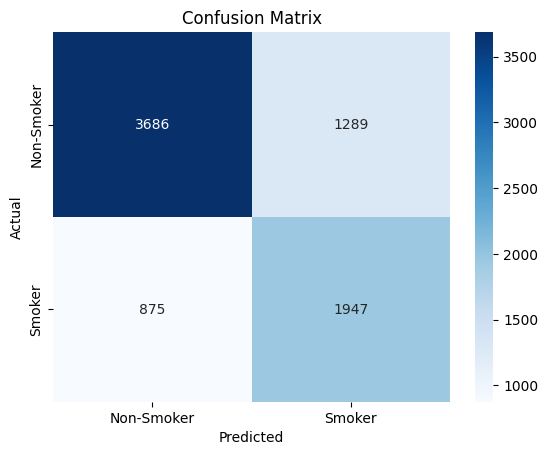

In [7]:
# 4) Оценка качества модели
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Матрица ошибок
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoker', 'Smoker'], yticklabels=['Non-Smoker', 'Smoker'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


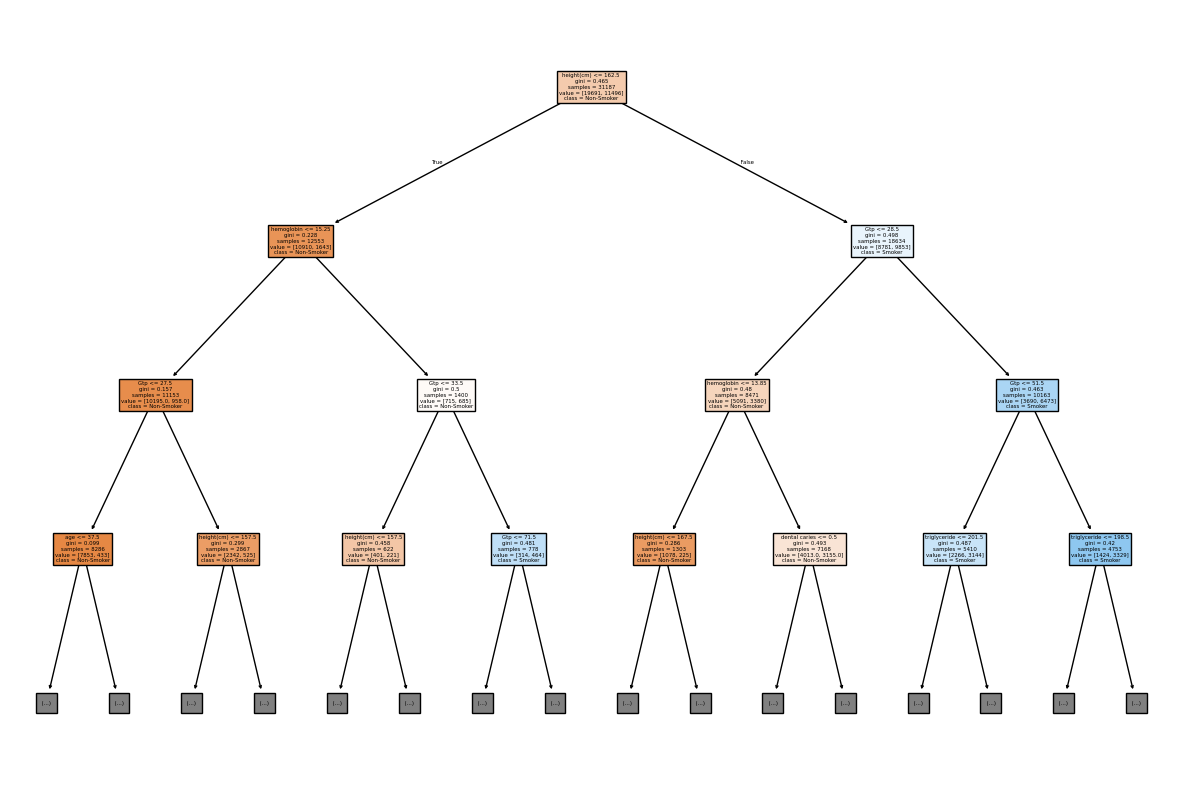

In [9]:
# 4) Визуализация дерева решений
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, criterion="gini", random_state=42)
model.fit(X_train, y_train)  

# 4) Визуализация дерева решений
plt.figure(figsize=(15, 10))  
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Non-Smoker", "Smoker"], max_depth=3)  

# Сохранение визуализации
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')  
plt.show()


In [10]:
#5
# Получаем важность признаков
feature_importances = model.feature_importances_

# Создаем DataFrame для удобного анализа
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Сортируем по убыванию значимости
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Выводим самый важный столбец
most_important_feature = importance_df.iloc[0]
print(f"Наиболее значимый признак: {most_important_feature['Feature']} (важность: {most_important_feature['Importance']:.4f})")

Наиболее значимый признак: height(cm) (важность: 0.6160)


In [12]:
#6 Построение модели Decision Tree с одним признаком
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Выбираем только height(cm) в качестве признака
X_single = X[['height(cm)']]
y_single = y  

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

# Обучаем модель
model_single = DecisionTreeClassifier(max_depth=3, random_state=42)
model_single.fit(X_train, y_train)

# Делаем предсказания
y_pred = model_single.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели с одним признаком: {accuracy:.4f}")
print("Отчет о классификации:\n", classification_report(y_test, y_pred))


Точность модели с одним признаком: 0.6715
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73      4975
           1       0.54      0.63      0.58      2822

    accuracy                           0.67      7797
   macro avg       0.65      0.66      0.66      7797
weighted avg       0.69      0.67      0.68      7797



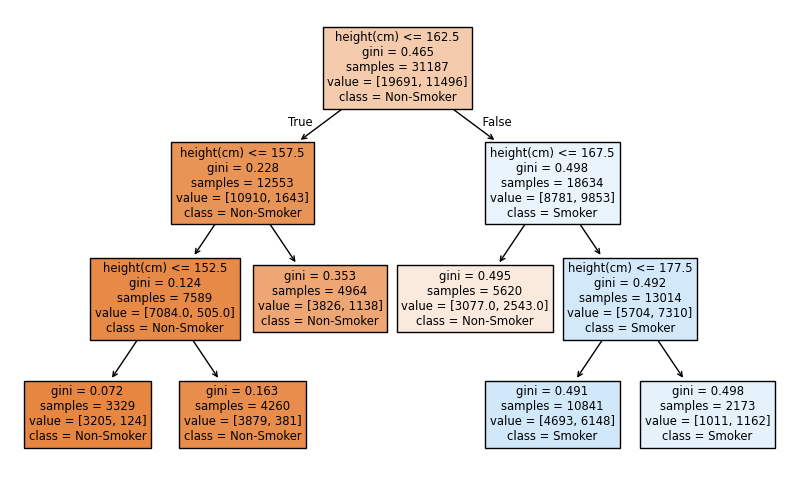

In [13]:
#7  Визуализация простого дерева решений
from sklearn.tree import plot_tree

# Создаем изображение дерева
plt.figure(figsize=(10, 6))
plot_tree(model_single, filled=True, feature_names=['height(cm)'], class_names=["Non-Smoker", "Smoker"])

# Сохраняем график
plt.savefig("decision_tree_single_feature.png", dpi=300, bbox_inches='tight')

# Показываем график
plt.show()
